# House Pricing Regression using Dense Neural Network (DNN)

## Import Libraries

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Upload and Explore Dataset
[The Boston house-price data](http://lib.stat.cmu.edu/datasets/boston)
* This is a dataset taken from the StatLib library which is maintained at Carnegie Mellon University.
* There are 506 samples, each one with 13 attributes (Features `Xi` from 0 to 12) of houses at different locations around the Boston suburbs in the late 1970s. The attributes themselves are defined in the StatLib website (as per capta crime rate in the area, number of rooms, distance  from employemment center, etc).
Below the attributes (or features) in order:
 - CRIM     per capita crime rate by town
 - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 - INDUS    proportion of non-retail business acres per town
 - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 - NOX      nitric oxides concentration (parts per 10 million)
 - RM       average number of rooms per dwelling
 - AGE      proportion of owner-occupied units built prior to 1940
 - DIS      weighted distances to five Boston employment centres
 - RAD      index of accessibility to radial highways
 - TAX      full-value property-tax rate per $10,000
 - PTRATIO  pupil-teacher ratio by town
 - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 - LSTAT    % lower status of the population
 MEDV     Median value of owner-occupied homes in \$1000's
- Target (`Y`) is the median values of the houses at a location (in USD 1,000).

**Goal**
*  Our goal is to build a regression model that takes these **13 features as input** and **output a single value prediction** of the "median value of owner-occupied homes (in USD 1000)."
* Dataset can be download direct from: [tf.keras.datasets.boston_housing](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/boston_housing/load_data)


In [41]:
data = tf.keras.datasets.boston_housing

(x_train, y_train), (x_test, y_test) = data.load_data()

In [42]:
print(x_train.shape)
print(y_train.shape)

(404, 13)
(404,)


In [43]:
print(x_test.shape)
print(y_test.shape)

(102, 13)
(102,)


In [44]:
x_train[10]

array([  9.59571,   0.     ,  18.1    ,   0.     ,   0.693  ,   6.404  ,
       100.     ,   1.639  ,  24.     , 666.     ,  20.2    , 376.11   ,
        20.31   ])

In [45]:
y_train[10]

12.1

In [46]:
y_train

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [47]:
print('Min price in $K:  ',y_train.min())
print('Mean price in $K:  ',round(y_train.mean(),2))
print('Max price in $K: ',y_train.max())

Min price in $K:   5.0
Mean price in $K:   22.4
Max price in $K:  50.0


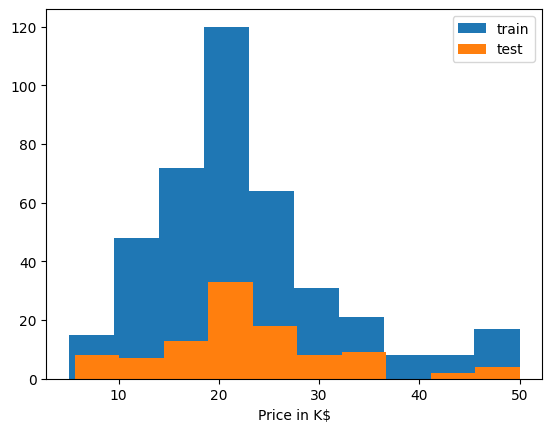

In [48]:
plt.hist(y_train, label='train')
plt.hist(y_test, label = 'test')
plt.xlabel('Price in K$')
plt.legend();

### Exploring Input Features

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# first we fit the scaler on the training dataset
scaler.fit(x_train)

# then we call the transform method to scale both the training and testing data
x_train_norm = scaler.transform(x_train)
x_test_norm = scaler.transform(x_test)

In [50]:
print (x_train_norm.max())
print (x_train_norm.min())

9.234847178400438
-3.8172503201932715


In [51]:
print(x_train_norm[0])

[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]


## Define Model

In [52]:
x_train.shape

(404, 13)

In [53]:
x_train.shape[1]

13

In [54]:
input_shape = x_train.shape[1]
input_shape

13

The model should be created, for example with those layers:
- [input] ==> [hidden] ==> [output]:
  - 13 ==> [20] ==>  1

The **Input Layer** should be 13 (number of features) and the **Output Layer** shoub be 1 to match the target (y). The number of neurons at **Hidden layers** are arbitrary.

In [55]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input([input_shape,]),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(1)
    ])

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 20)                  │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 301 (1.18 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

In [56]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(20,
                          activation='relu',
                          input_shape = [13]),
    tf.keras.layers.Dense(1)
    ])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 20)                  │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 301 (1.18 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

##Compile Model

In [57]:
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae'] # used to monitor the training and testing steps.
    )

In [58]:
history = model.fit(
    x_train_norm,
    y_train,
    epochs=1000,
    verbose=0
    )

In [59]:
history.history.keys()

dict_keys(['loss', 'mae'])

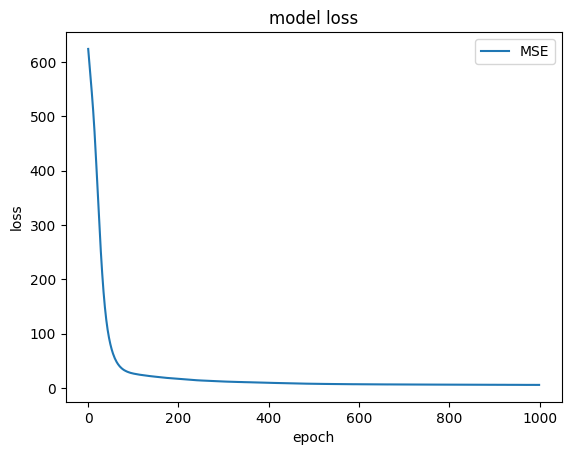

In [60]:
plt.plot(history.history['loss'], label='MSE')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper right')
#plt.ylim([0,50])
plt.show()

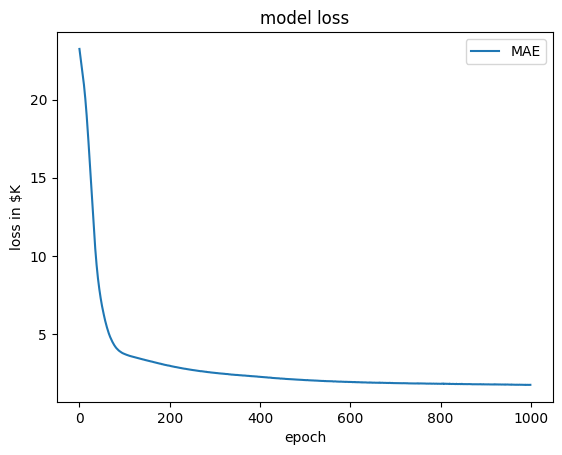

In [61]:
plt.plot(history.history['mae'], label='MAE')
plt.title('model loss')
plt.ylabel('loss in $K')
plt.xlabel('epoch')
plt.legend(loc='upper right')
#plt.ylim([0,50])
plt.show()

## Testing the trained model

In [62]:
test_eval = model.evaluate(x_test_norm, y_test)
print ("Test data MAE: {:.2}".format(test_eval[1]))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12.0988 - mae: 2.4540 
Test data MAE: 2.7


In [63]:
rsme = round(np.sqrt(test_eval[0]), 3)
rsme

4.034

In [64]:
y_hat = model.predict(x_test_norm)
print(y_hat[:5]) # get the output predict values for the 5 first samples

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[[ 8.930839]
 [18.377094]
 [22.429718]
 [33.576385]
 [25.227541]]


In [65]:
y_test[:5]

array([ 7.2, 18.8, 19. , 27. , 22.2])

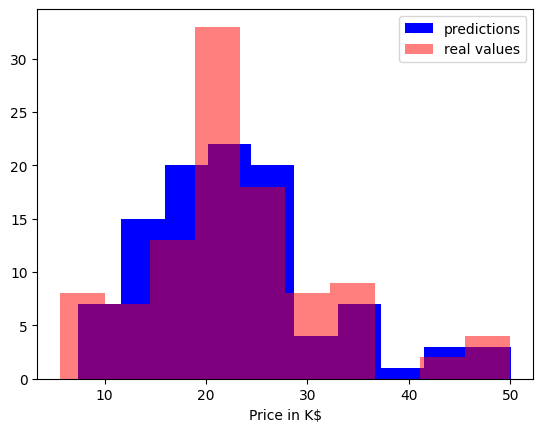

In [66]:
plt.hist(y_hat, label='predictions', color = 'b')
plt.hist(y_test, label = 'real values', color = 'r', alpha=0.5)
plt.xlabel('Price in K$')
plt.legend();

## Doing Inference

In [67]:
xt = np.array([1.1, 0., 9., 0., 0.6, 7., 92., 3.8 , 4., 300., 21., 200, 19.5])
xt.shape

(13,)

In [68]:
x_train.shape

(404, 13)

In [69]:
xt = np.reshape(xt, (1, 13))
xt.shape

(1, 13)

In [70]:
xt

array([[  1.1,   0. ,   9. ,   0. ,   0.6,   7. ,  92. ,   3.8,   4. ,
        300. ,  21. , 200. ,  19.5]])

In [71]:
xt_norm = scaler.transform(xt)
xt_norm

array([[-0.28659955, -0.48361547, -0.30934443, -0.25683275,  0.36401915,
         1.03386853,  0.82381223,  0.02945662, -0.62624905, -0.63729594,
         1.14850044, -1.64672402,  0.93287232]])

In [72]:
yt = model.predict(xt_norm)
yt

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([[14.813347]], dtype=float32)

In [73]:
xt = np.array([1.1, 0., 9., 0., 0.6, 7., 92., 3.8 , 4., 300., 21., 200, 19.5])
xt = np.reshape(xt, (1, 13))
xt_norm = scaler.transform(xt)
yt = model.predict(xt_norm)
print("The predict value for this house is US${:.2f} thousand".format(yt[0][0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
The predict value for this house is US$14.81 thousand
